## Final Project Submission

Please fill out:
* Student name: Samuel Marder
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: Matt Bombard
* Blog post URL:


# Overview

# Business Understanding

Century 21 is looking to expand its housing footprint. This would be made a lot easier having a regression model to work from

# Data Understanding

* We have data from several recent sales of houses including when the house built, sqft of the lot and of the living space
* This data is suitable for regression because we have multiple features that could be useful to a model such as year built, waterfront view, and more


# Data Analysis

In [1]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data/kc_house_data.csv", index_col="id")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [3]:
relevant_cols = [
    "price",
    "bedrooms",		# Number of bedrooms
    "bathrooms",	# Number of bathrooms
    "sqft_living",	# Square foot of living space
    "sqft_lot",		# Square foot of the lot
    "floors",		# Number of floors
    "waterfront",	# If there is a waterfront view
    "condition",	# How good the overall condition of the house is
    "grade",		# Overall grade of the house
    "yr_built"]		# Year the house was built in

df = df[relevant_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.8+ MB


Test for nulls first to see if we can impute the missing values

In [4]:
print(df.isna().sum())

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64


Impute a value for null that makes sense for the waterfront column

In [5]:
df['waterfront'].fillna(value="NO", inplace=True)
print(df.isna().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64


C:\Users\smard\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Taking a look to see what values we are dealing with in these columns

In [6]:
print(df.condition.value_counts())
print()
print(df.waterfront.value_counts())
print()
print(df.grade.value_counts())

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

NO     21451
YES      146
Name: waterfront, dtype: int64

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


Impute as numbers for waterfront and condition

In [7]:
def waterfront_to_num(wf):
    if wf == "YES":
        return 1
    elif wf == "NO":
        return 0
    else:
        return wf

def condition_to_num(condition):
    if condition == "Average":
        return 3
    elif condition == "Good":
        return 4
    elif condition == "Very Good":
        return 5
    elif condition == "Fair":
        return 2
    elif condition == "Poor":
        return 1
    else:
        return condition
    
def regress(X, y, random=42448):
    linreg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)
    print('R Score:', linreg.score(X_test, y_test))

In [8]:
df.loc[:, 'waterfront'] = df.waterfront.apply(waterfront_to_num)

df.loc[:, 'condition'] = df.condition.apply(condition_to_num)

df.loc[:, 'grade'] = df['grade'].replace(to_replace=r'\D', value=r'', regex=True)
df.loc[:, 'grade'] = df["grade"].astype(int)

df = df[df['yr_built'] > 1939]

print(df.condition.value_counts())
print()
print(df.waterfront.value_counts())
print()
print(df.grade.value_counts())

C:\Users\smard\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


3    12605
4     4582
5     1108
2      120
1       10
Name: condition, dtype: int64

0    18313
1      112
Name: waterfront, dtype: int64

7     7478
8     5516
9     2430
6     1329
10    1066
11     378
5      120
12      84
4       14
13      10
Name: grade, dtype: int64


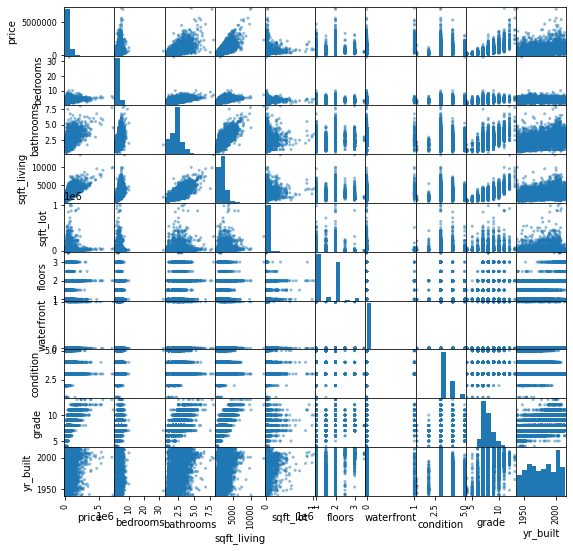

In [9]:
pd.plotting.scatter_matrix(df,figsize = [9, 9]);

In [10]:
df['house_score'] = df['grade'] * np.log(df['sqft_living'])
df["log_price"] = np.log(df['price'])
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,house_score,log_price
price,1.000000,0.298523,0.544501,0.712076,0.117837,0.231172,0.285325,-0.011284,0.687266,0.172995,0.722026,0.893830
bedrooms,0.298523,1.000000,0.499442,0.565692,0.028344,0.122438,0.000664,0.027770,0.331262,0.142645,0.419844,0.338663
bathrooms,0.544501,0.499442,1.000000,0.747630,0.096908,0.500334,0.070603,-0.160605,0.656806,0.570424,0.716246,0.583322
sqft_living,0.712076,0.565692,0.747630,1.000000,0.196631,0.317930,0.114103,-0.082663,0.761833,0.347859,0.864566,0.717614
sqft_lot,0.117837,0.028344,0.096908,0.196631,1.000000,-0.007288,0.020373,0.000720,0.134010,0.022170,0.156742,0.134193
floors,0.231172,0.122438,0.500334,0.317930,-0.007288,1.000000,0.020490,-0.320208,0.441097,0.683587,0.427238,0.294007
waterfront,0.285325,0.000664,0.070603,0.114103,0.020373,0.020490,1.000000,0.015585,0.094778,-0.024280,0.102085,0.178458
condition,-0.011284,0.027770,-0.160605,-0.082663,0.000720,-0.320208,0.015585,1.000000,-0.169425,-0.394558,-0.152098,-0.016572
grade,0.687266,0.331262,0.656806,0.761833,0.134010,0.441097,0.094778,-0.169425,1.000000,0.484180,0.982731,0.731376
yr_built,0.172995,0.142645,0.570424,0.347859,0.022170,0.683587,-0.024280,-0.394558,0.484180,1.000000,0.471194,0.230498


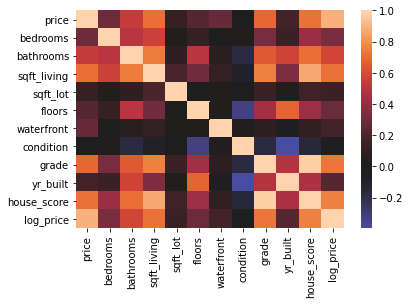

In [11]:
sns.heatmap(df.corr(), center=0);

In [12]:
f = "price~sqft_living"
baseline_model = ols(formula=f, data=df).fit()
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:10   Log-Likelihood:            -2.5534e+05
No. Observations:               18425   AIC:                         5.107e+05
Df Residuals:                   18423   BIC:                         5.107e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -6.32e+04   4690.665    -13.475      

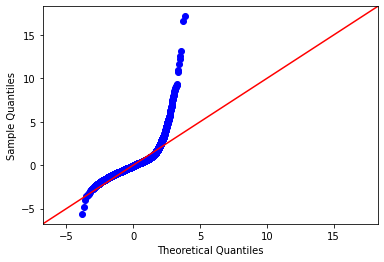

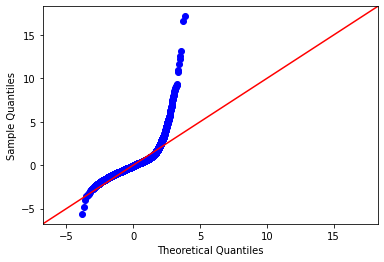

In [13]:
sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

In [14]:
f = "price~house_score"
model_two = ols(formula=f, data=df).fit()
print(model_two.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 2.006e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:            -2.5507e+05
No. Observations:               18425   AIC:                         5.101e+05
Df Residuals:                   18423   BIC:                         5.102e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.936e+05   9519.005    -83.366      

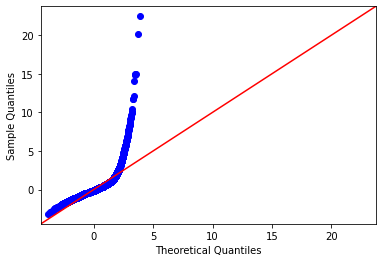

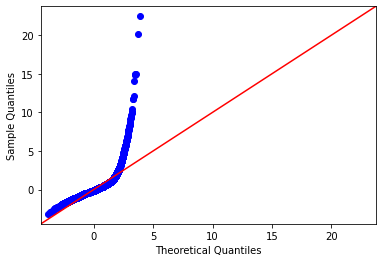

In [15]:
sm.graphics.qqplot(model_two.resid, dist=stats.norm, line='45', fit=True)

In [16]:
f = "log_price~house_score"
model_three = ols(formula=f, data=df).fit()
print(model_three.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                 2.581e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:11   Log-Likelihood:                -6055.0
No. Observations:               18425   AIC:                         1.211e+04
Df Residuals:                   18423   BIC:                         1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0030      0.013    855.777      

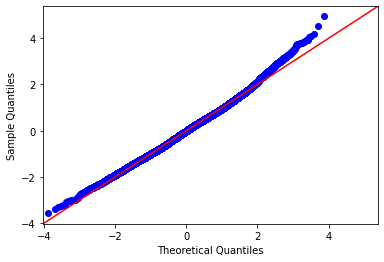

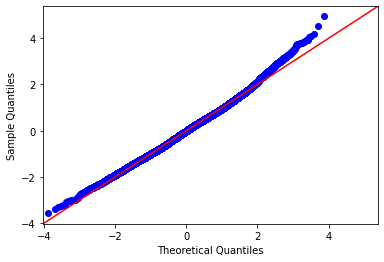

In [17]:
sm.graphics.qqplot(model_three.resid, dist=stats.norm, line='45', fit=True)

In [18]:
X = df[["house_score"]]
y = df["log_price"]
regress(X, y)

Train Mean Squarred Error: 0.11290475542497189
Test Mean Squarred Error: 0.11317768633197811
R Score: 0.5875847225022888


In [19]:
f = "log_price~house_score+yr_built"
model_four = ols(formula=f, data=df).fit()
print(model_four.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 1.411e+04
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:10:12   Log-Likelihood:                -5565.8
No. Observations:               18425   AIC:                         1.114e+04
Df Residuals:                   18422   BIC:                         1.116e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      18.7494      0.245     76.619      

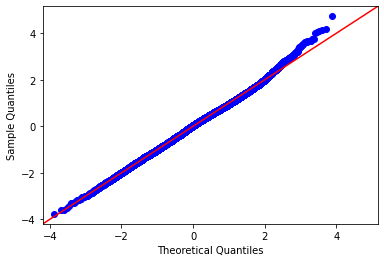

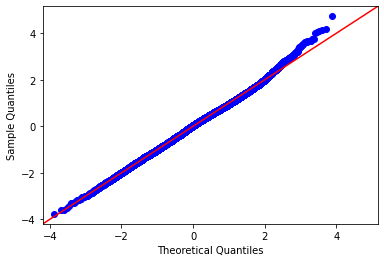

In [20]:
sm.graphics.qqplot(model_four.resid, dist=stats.norm, line='45', fit=True)

In [21]:
X = df[["house_score", "yr_built"]]
y = df["log_price"]
regress(X, y)

Train Mean Squarred Error: 0.10700494771452422
Test Mean Squarred Error: 0.10750357689173017
R Score: 0.6082609661612038


In [22]:
X = df.drop(["sqft_living", "grade", "price", "log_price"], axis=1)
y = df["log_price"]
regress(X, y)
X.info()

Train Mean Squarred Error: 0.09953604142321126
Test Mean Squarred Error: 0.10115998968690339
R Score: 0.6313767618820638
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18425 entries, 7129300520 to 1523300157
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     18425 non-null  int64  
 1   bathrooms    18425 non-null  float64
 2   sqft_lot     18425 non-null  int64  
 3   floors       18425 non-null  float64
 4   waterfront   18425 non-null  int64  
 5   condition    18425 non-null  int64  
 6   yr_built     18425 non-null  int64  
 7   house_score  18425 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB
